# **Music Data Analysis using PySpark**

### Let's mount the google drive 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Task 1 : 
Installing pyspark module

In [ ]:
!pip install pyspark

     |████████████████████████████████| 212.4 MB 63 kB/s 
     |████████████████████████████████| 198 kB 64.4 MB/s 
  Created wheel for pyspark: filename=pyspark-3.1.2-py2.py3-none-any.whl size=212880768 sha256=1d2c76d2c79c48298c4d5cf2d2b650831f18cf6cb7da97832eb954bd7ba4e986
  Stored in directory: /root/.cache/pip/wheels/a5/0a/c1/9561f6fecb759579a7d863dcd846daaa95f598744e71b02c77
Successfully built pyspark


Importing the modules 

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import count, desc , col, max, struct 
import matplotlib.pyplot as plt

creating spark session

In [ ]:
spark = SparkSession.builder.appName('spark_app').getOrCreate()

# Task 2 : 
importing the *Listenings.csv* file: 

In [ ]:
listening_csv_path = '/content/drive/MyDrive/dataset/listenings.csv'
listening_df = spark.read.csv(listening_csv_path, header=True, inferSchema=True)

let's check the data:

In [ ]:
# Check the type of listening_df
print("The type of listening_df is", type(listening_df))

The type of listening_df is <class 'pyspark.sql.dataframe.DataFrame'>


In [ ]:
listening_df.show(10)

+-----------+-------------+--------------------+------------+--------------------+
|    user_id|         date|               track|      artist|               album|
+-----------+-------------+--------------------+------------+--------------------+
|000Silenced|1299680100000|           Price Tag|    Jessie J|         Who You Are|
|000Silenced|1299679920000|Price Tag (Acoust...|    Jessie J|           Price Tag|
|000Silenced|1299679440000|Be Mine! (Ballad ...|       Robyn|            Be Mine!|
|000Silenced|1299679200000|            Acapella|       Kelis|            Acapella|
|000Silenced|1299675660000|   I'm Not Invisible|   The Tease|   I'm Not Invisible|
|000Silenced|1297511400000|Bounce (Feat NORE...|    MSTRKRFT|         Fist of God|
|000Silenced|1294498440000|Don't Stop The Mu...|     Rihanna|Addicted 2 Bassli...|
|000Silenced|1292438340000|               ObZen|   Meshuggah|               ObZen|
|000Silenced|1292437740000|   Yama's Messengers|      Gojira|The Way of All Flesh|
|000

let's delete useless columns:

In [ ]:
listening_df = listening_df.drop('date')

In [ ]:
shape = (listening_df.count(), len(listening_df.columns))
print(shape)

(14650594, 4)


drop the null rows:

In [ ]:
listening_df = listening_df.na.drop()

let's check the dataset again:

In [ ]:
listening_df.show(5)

+-----------+--------------------+---------+-----------------+
|    user_id|               track|   artist|            album|
+-----------+--------------------+---------+-----------------+
|000Silenced|           Price Tag| Jessie J|      Who You Are|
|000Silenced|Price Tag (Acoust...| Jessie J|        Price Tag|
|000Silenced|Be Mine! (Ballad ...|    Robyn|         Be Mine!|
|000Silenced|            Acapella|    Kelis|         Acapella|
|000Silenced|   I'm Not Invisible|The Tease|I'm Not Invisible|
+-----------+--------------------+---------+-----------------+
only showing top 5 rows



let's see the schema: 

In [ ]:
listening_df.printSchema()

root
 |-- user_id: string (nullable = true)
 |-- track: string (nullable = true)
 |-- artist: string (nullable = true)
 |-- album: string (nullable = true)



let's see the shape of our dataframe: 

In [ ]:
shape = (listening_df.count(), len(listening_df.columns))
print(shape)

(13758905, 4)


# Task 3:

**Query #0:**
select two columns: artist and track

In [ ]:
q0 = listening_df.select('artist', 'track')
q0.show(10)

+------------+--------------------+
|      artist|               track|
+------------+--------------------+
|    Jessie J|           Price Tag|
|    Jessie J|Price Tag (Acoust...|
|       Robyn|Be Mine! (Ballad ...|
|       Kelis|            Acapella|
|   The Tease|   I'm Not Invisible|
|    MSTRKRFT|Bounce (Feat NORE...|
|     Rihanna|Don't Stop The Mu...|
|   Meshuggah|               ObZen|
|      Gojira|   Yama's Messengers|
|Napalm Death|On the Brink of E...|
+------------+--------------------+
only showing top 10 rows



**Query #1**:

Let's find all of the records of those users who have listened to ***Rihanna***

In [ ]:
q1 = listening_df.select('*').filter(listening_df.artist == 'Rihanna')
q1.show(10)

+-----------+--------------------+-------+--------------------+
|    user_id|               track| artist|               album|
+-----------+--------------------+-------+--------------------+
|000Silenced|Don't Stop The Mu...|Rihanna|Addicted 2 Bassli...|
|000Silenced|           Disturbia|Rihanna|Good Girl Gone Ba...|
|00williamsl|   Hatin On The Club|Rihanna|              Random|
|00williamsl|   Hatin On The Club|Rihanna|              Random|
|00williamsl|         Complicated|Rihanna|                Loud|
|00williamsl|What's My Name (f...|Rihanna|                Loud|
|00williamsl|Kanye West feat R...|Rihanna|                Loud|
|    0502008|Only Girl (In the...|Rihanna|                Loud|
|      0rdos|Pon De Replay (Re...|Rihanna|    Music of the Sun|
|      0rdos|          Now I Know|Rihanna|    Music of the Sun|
+-----------+--------------------+-------+--------------------+
only showing top 10 rows



In [ ]:
print(q1.count())

41594


**Query #2:**

Let's find top 10 users who are fan of ***Rihanna***

In [ ]:
q2 = listening_df.select('user_id').filter(listening_df.artist == 'Rihanna').groupBy('user_id').count().orderBy(desc('count')).limit(10)
q2.show()

+---------------+-----+
|        user_id|count|
+---------------+-----+
|        thiessu|  179|
|    eyessetkyle|  166|
|           adxx|  164|
|missnumberthree|  156|
|helloiamnatalie|  128|
|          nmjnb|  124|
|        AndyyyA|  123|
|     BIGBANG186|  121|
|     mixedvibes|  120|
|       AndyKitt|  115|
+---------------+-----+



**Query #3:**

find top 10 famous tracks 

In [ ]:
q3 = listening_df.select('artist','track').groupBy('artist','track').count().orderBy(desc('count')).limit(10)
q3.show()

+--------------+-----------------+-----+
|        artist|            track|count|
+--------------+-----------------+-----+
| Justin Bieber|            Sorry| 3381|
|Arctic Monkeys| Do I Wanna Know?| 2865|
|      Bon Iver|      Skinny Love| 2836|
|          Zayn|       PILLOWTALK| 2701|
|   The Killers|    Mr Brightside| 2690|
|       Rihanna|             Work| 2646|
|      Bastille|          Pompeii| 2606|
|Mumford & Sons|  Little Lion Man| 2520|
|Mumford & Sons|         The Cave| 2485|
| Justin Bieber|What Do You Mean?| 2481|
+--------------+-----------------+-----+



**Query #4:**

find top 10 famous tracks of ***Rihanna*** 

In [ ]:
q4 = listening_df.select('artist','track').filter(listening_df.artist == 'Rihanna').groupby('artist','track').count().orderBy(desc('count')).limit(10)
q4.show()

+-------+--------------------+-----+
| artist|               track|count|
+-------+--------------------+-----+
|Rihanna|                Work| 2646|
|Rihanna|Only Girl (In the...| 1749|
|Rihanna|We Found Love (fe...| 1575|
|Rihanna|                 S&M| 1307|
|Rihanna|            Rude Boy| 1303|
|Rihanna|            Diamonds| 1224|
|Rihanna|      Kiss it Better|  945|
|Rihanna| Where Have You Been|  844|
|Rihanna|Cheers (Drink to ...|  697|
|Rihanna|           Needed Me|  679|
+-------+--------------------+-----+



**Query #5:**

find top 10 famous albums 

In [ ]:
top10_albums = listening_df.select('artist','album').groupBy('artist','album').count().orderBy(desc('count')).limit(10)
top10_albums.show()

+--------------------+--------------------+-----+
|              artist|               album|count|
+--------------------+--------------------+-----+
|          Kanye West|   The Life Of Pablo|22310|
|              The xx|                  xx|14195|
|      Arctic Monkeys|                  AM|14090|
|               alt-J|     An Awesome Wave|13635|
|      Mumford & Sons|        Sigh No More|13543|
|      Arctic Monkeys|Whatever People S...|12731|
|            Bon Iver|            For Emma|11994|
|              Grimes|          Art Angels|11655|
|Florence + the Ma...|               Lungs|11362|
|               Adele|                  21|11215|
+--------------------+--------------------+-----+



find top 10 famous artists

In [ ]:
top10_artists = listening_df.select('artist').groupBy('artist').count().orderBy(desc('count')).limit(10)
top10_artists.show()

+--------------+-----+
|        artist|count|
+--------------+-----+
|   David Bowie|64056|
|    Kanye West|55423|
|Arctic Monkeys|52428|
|   The Beatles|52420|
|     Radiohead|47309|
|          Muse|43664|
|     Lady Gaga|41651|
|       Rihanna|41594|
|      Coldplay|36681|
|  Taylor Swift|36527|
+--------------+-----+



# Task 4 :
importing the ***genre.csv*** file:

In [ ]:
 genre_csv_path = '/content/drive/MyDrive/dataset/genre.csv'
 genre_df = spark.read.csv(genre_csv_path, header=True, inferSchema=True)

let's check the data

In [ ]:
 genre_df.show(15)

+--------------------+-----+
|              artist|genre|
+--------------------+-----+
|                Muse| rock|
|             Nirvana| rock|
|            Bon Jovi| rock|
|          The Police| rock|
|                Kiss| rock|
|       Guns N' Roses| rock|
|         Rusted Root| rock|
|Katrina and the W...|  pop|
|         The Beatles| rock|
|        Hall & Oates|  pop|
|        Otis Redding| soul|
|         Marvin Gaye| soul|
|     The Cranberries| rock|
|            Survivor| rock|
|       Fleetwood Mac|blues|
+--------------------+-----+
only showing top 15 rows



In [ ]:
print(genre_df.count())

138432


Let's inner join these two data frames

In [ ]:
df = listening_df.join(genre_df, how='inner', on=['artist'])
df.show()

+------------+-----------+--------------------+--------------------+--------------------+
|      artist|    user_id|               track|               album|               genre|
+------------+-----------+--------------------+--------------------+--------------------+
|    Jessie J|000Silenced|           Price Tag|         Who You Are| Ariana Grande & ...|
|    Jessie J|000Silenced|           Price Tag|         Who You Are| Jhene Aiko & Rixton|
|    Jessie J|000Silenced|           Price Tag|         Who You Are| Nicki Minaj & Ar...|
|    Jessie J|000Silenced|           Price Tag|         Who You Are|                 pop|
|    Jessie J|000Silenced|Price Tag (Acoust...|           Price Tag| Ariana Grande & ...|
|    Jessie J|000Silenced|Price Tag (Acoust...|           Price Tag| Jhene Aiko & Rixton|
|    Jessie J|000Silenced|Price Tag (Acoust...|           Price Tag| Nicki Minaj & Ar...|
|    Jessie J|000Silenced|Price Tag (Acoust...|           Price Tag|                 pop|
|       Ro

**Query #6**

find top 10 users who are fan of ***pop*** music

In [ ]:
q6 = df.select('user_id').filter(df.genre == 'pop').groupby('user_id').count().orderBy(desc('count')).limit(10)
q6.show()

+---------------+-----+
|        user_id|count|
+---------------+-----+
|        01Green|  496|
|      momousagi|  400|
|          mrpsb|  400|
|   BlueKnockOut|  378|
|    musicboy80s|  376|
|  incultojurgis|  374|
| ElektricOrchid|  370|
|foreign_fanatic|  350|
|   Kevin_Soutar|  346|
|  landrover2171|  301|
+---------------+-----+



**Query #7**

find top 10 famous genres

In [ ]:
top10_genres = df.select('genre').groupBy('genre').count().orderBy(desc('count')).limit(10)
top10_genres.show()

+----------+-------+
|     genre|  count|
+----------+-------+
|      rock|2691934|
|       pop|1544747|
|electronic| 551509|
|   hip hop| 532984|
|      folk| 438174|
|indie rock| 431439|
|      punk| 380915|
|       r&b| 344101|
|     metal| 208107|
|     indie| 206726|
+----------+-------+



# Task 5:
**Query #8**

find out each user favorite genre

In [ ]:
user_genre = df.select('user_id', 'genre').groupBy('user_id', 'genre').count().orderBy('user_id', desc('count'))
user_genre.show(10)

+-------+----------+-----+
|user_id|     genre|count|
+-------+----------+-----+
| --Seph| classical|   31|
| --Seph|      rock|   27|
| --Seph|indie rock|   15|
| --Seph|     opera|   12|
| --Seph|      folk|   10|
| --Seph|       pop|    9|
| --Seph|     Bjorn|    8|
| --Seph|   hip hop|    7|
| --Seph|   ambient|    6|
| --Seph|electronic|    6|
+-------+----------+-----+
only showing top 10 rows



In [ ]:
user_top_genre = user_genre.groupBy('user_id').agg(max(struct(col('count'), col('genre'))).alias('max'))
user_top_genre.show(10)

+--------------+-----------------+
|       user_id|              max|
+--------------+-----------------+
|       -Gemma-|{38, british pop}|
|       247flix|   {78, synthpop}|
|    A3sahaettr|      {60, metal}|
|       AYFBlog| {98, indie rock}|
| AdamMcSpaddam|       {79, rock}|
|       Alukarl|{85, death metal}|
|      Ambalina|        {53, pop}|
|       AndyEgg|       {54, rock}|
|AngerisaGift14|       {58, rock}|
|     Anndddyyy|      {116, rock}|
+--------------+-----------------+
only showing top 10 rows



In [ ]:
user_top_genre = user_top_genre.select('user_id', col('max.genre'))
user_top_genre.show()

+---------------+-----------------+
|        user_id|            genre|
+---------------+-----------------+
|        -Gemma-|      british pop|
|        247flix|         synthpop|
|     A3sahaettr|            metal|
|        AYFBlog|       indie rock|
|  AdamMcSpaddam|             rock|
|        Alukarl|      death metal|
|       Ambalina|              pop|
|        AndyEgg|             rock|
| AngerisaGift14|             rock|
|      Anndddyyy|             rock|
|     BasilBrush|             rock|
|     BernieLick|             rock|
|      Big_Tiger|            indie|
|          Birks|singer-songwriter|
|         BolaJA|             rock|
|        Boone92|        metalcore|
|CameronWhittall|              pop|
|        Ceolmor|       electronic|
| CheeseMonkey91|              emo|
|  Chilled-Lemon|             rock|
+---------------+-----------------+
only showing top 20 rows



**Query #9**

find out how many pop,rock,metal and hip hop singers we have

and then visulize it using bar chart 

In [ ]:
genre_counts = genre_df.select('genre').filter(col('genre').isin('pop', 'rock','metal', 'hip hop')).groupby('genre').count()
genre_counts.show()

+-------+-----+
|  genre|count|
+-------+-----+
|    pop| 6960|
|hip hop| 4288|
|  metal| 1854|
|   rock| 9066|
+-------+-----+



Now, let's visualize the results using ***matplotlib***

In [ ]:
genre_counts.collect()

[Row(genre='pop', count=6960),
 Row(genre='hip hop', count=4288),
 Row(genre='metal', count=1854),
 Row(genre='rock', count=9066)]

In [ ]:
genre_counts = genre_counts.toPandas()

In [ ]:
genre_counts

,genre,count
0,pop,6960
1,hip hop,4288
2,metal,1854
3,rock,9066


now lets visualize these two lists using a bar chart

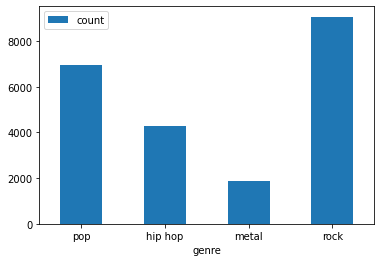

In [ ]:
genre_counts.plot.bar('genre', 'count', rot=0)
plt.show()